### PROJECT OVERVIEW
This project uses machine learning to support UN Sustainable Development Goal 3 (Good Health and Well-being) by predicting life expectancy based on health indicators. Using regression algorithms like Random Forest, the model analyzes health data including mortality rates, immunization coverage, healthcare spending, and education levels to forecast life expectancy across different countries. The goal is to provide policymakers with a data-driven tool that identifies which health factors most strongly influence life expectancy, enabling better healthcare decisions and resource allocation to improve global health outcomes.

### PROBLEM STATEMENT
Healthcare policymakers struggle to effectively allocate limited resources because they don't know which health interventions will have the biggest impact on life expectancy. Current decisions often rely on guesswork rather than data, leading to wasted resources and missed opportunities to save lives. We need a predictive model that can accurately identify the most important health factors affecting life expectancy and help policymakers prioritize their investments. The model should predict life expectancy with high accuracy and provide clear insights about which health indicators matter most for improving population health.

### PROJECT OBJECTIVE
 • Build a high-accuracy predictive model for life expectancy estimation.
                                         
 • Identify and rank the most critical health indicators that influence population 
longevity.

 • Provide actionable insights to help optimize healthcare resource allocation.
     
 • Replace guesswork-based policy decisions with evidence-based 
recommendations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import probplot
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
# Display basic info and first few rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
# Strip spaces in column names
df.columns = df.columns.str.strip()

In [5]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [6]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [7]:
df.nunique()

Country                             193
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1076
percentage expenditure             2328
Hepatitis B                          87
Measles                             958
BMI                                 608
under-five deaths                   252
Polio                                73
Total expenditure                   818
Diphtheria                           81
HIV/AIDS                            200
GDP                                2490
Population                         2278
thinness  1-19 years                200
thinness 5-9 years                  207
Income composition of resources     625
Schooling                           173
dtype: int64

In [8]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2933    False
2934    False
2935    False
2936    False
2937    False
Length: 2938, dtype: bool

In [9]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [10]:
# --- Data Cleaning ---
print("\n=== DATA CLEANING ===")



=== DATA CLEANING ===


In [12]:
# Drop rows with missing target values
df.columns = df.columns.str.strip()
# Now try dropping NAs
df = df.dropna(subset=['Life expectancy'])

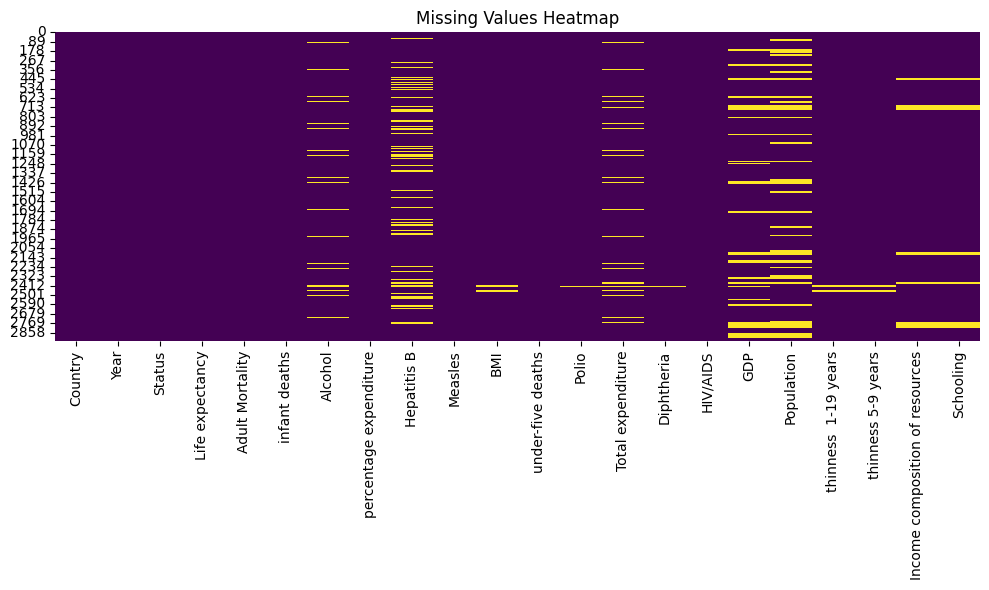

In [13]:
# 📌 Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.tight_layout()
plt.show()

In [14]:
from sklearn.impute import SimpleImputer

In [15]:

# Impute numerical missing values with median
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = SimpleImputer(strategy='median').fit_transform(df[numeric_cols])

# # Encode 'Status' column (Developing/Developed)
# df = pd.get_dummies(df, columns=['Status'], drop_first=True)

In [16]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [17]:
df1=df.copy()
df1.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015.0,Developing,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014.0,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013.0,Developing,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012.0,Developing,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011.0,Developing,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [20]:
# --- EXPLORATORY DATA ANALYSIS ---
print("\n=== EXPLORATORY DATA ANALYSIS  ===")



=== EXPLORATORY DATA ANALYSIS  ===


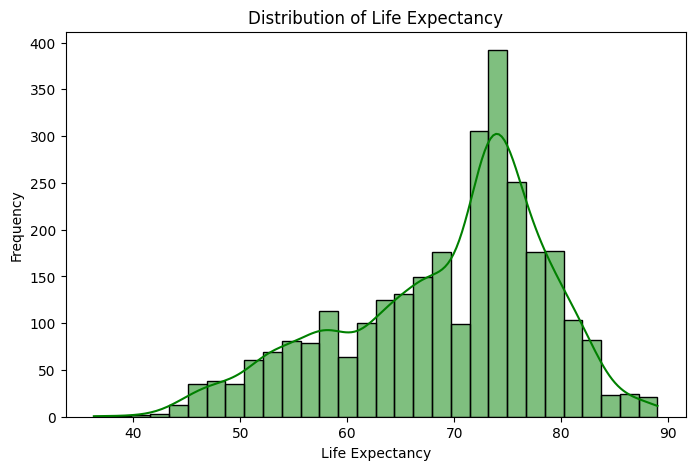

In [21]:
# Distribution of Life Expectancy
plt.figure(figsize=(8, 5))
sns.histplot(df1['Life expectancy'], bins=30, kde=True, color='green')
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.show()

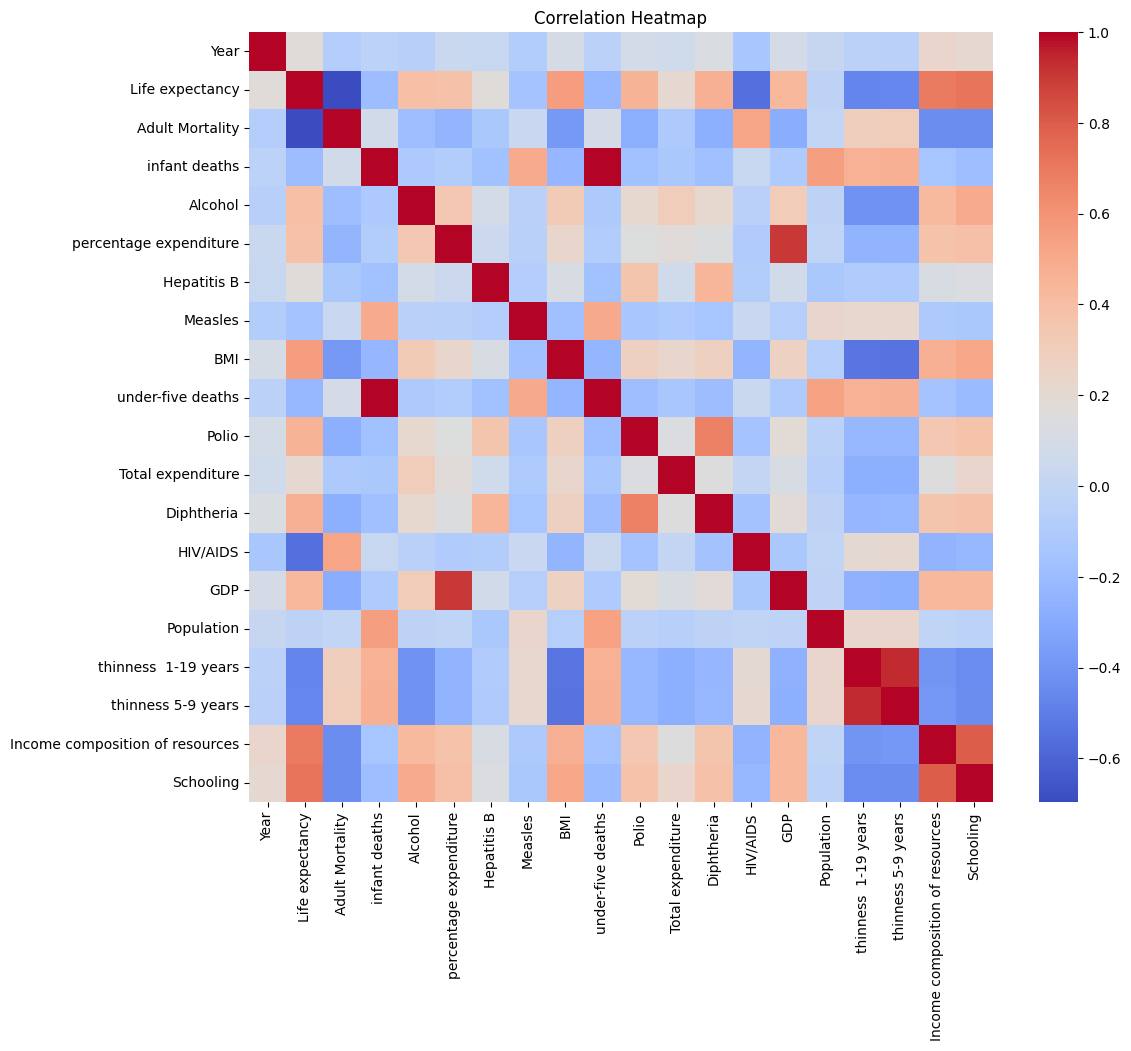

In [22]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df1.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

In [23]:
# Top correlated features with Life Expectancy
correlations = df.corr(numeric_only=True)['Life expectancy'].drop('Life expectancy').sort_values(ascending=False)
print("Top 10 positive correlations:\n", correlations.head(10))
print("Top 10 negative correlations:\n", correlations.tail(10))

Top 10 positive correlations:
 Schooling                          0.717314
Income composition of resources    0.688591
BMI                                0.558888
Diphtheria                         0.473268
Polio                              0.459458
GDP                                0.430991
Alcohol                            0.390674
percentage expenditure             0.381864
Total expenditure                  0.209588
Hepatitis B                        0.171255
Name: Life expectancy, dtype: float64
Top 10 negative correlations:
 Hepatitis B             0.171255
Year                    0.170033
Population             -0.028842
Measles                -0.157586
infant deaths          -0.196557
under-five deaths      -0.222529
thinness 5-9 years     -0.462645
thinness  1-19 years   -0.467859
HIV/AIDS               -0.556556
Adult Mortality        -0.696359
Name: Life expectancy, dtype: float64


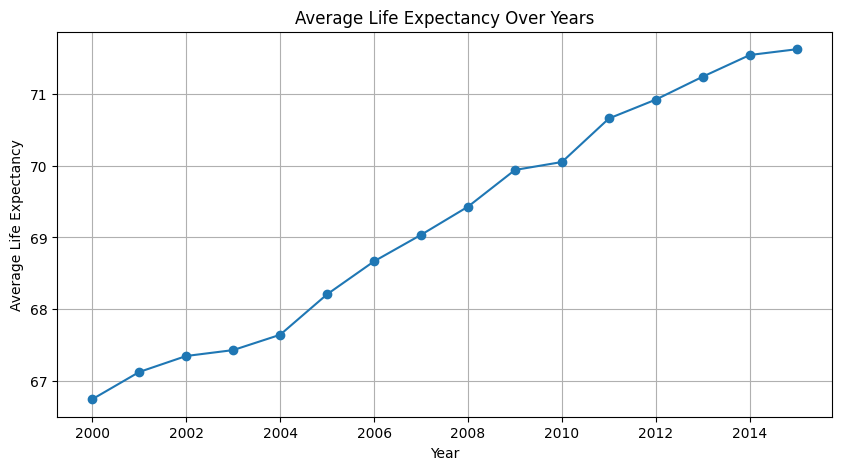

In [24]:
# Average life expectancy per year
avg_life_expectancy = df1.groupby('Year')['Life expectancy'].mean()
plt.figure(figsize=(10, 5))
plt.plot(avg_life_expectancy.index, avg_life_expectancy.values, marker='o')
plt.title('Average Life Expectancy Over Years')
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.grid(True)
plt.show()

<Figure size 1500x1000 with 0 Axes>

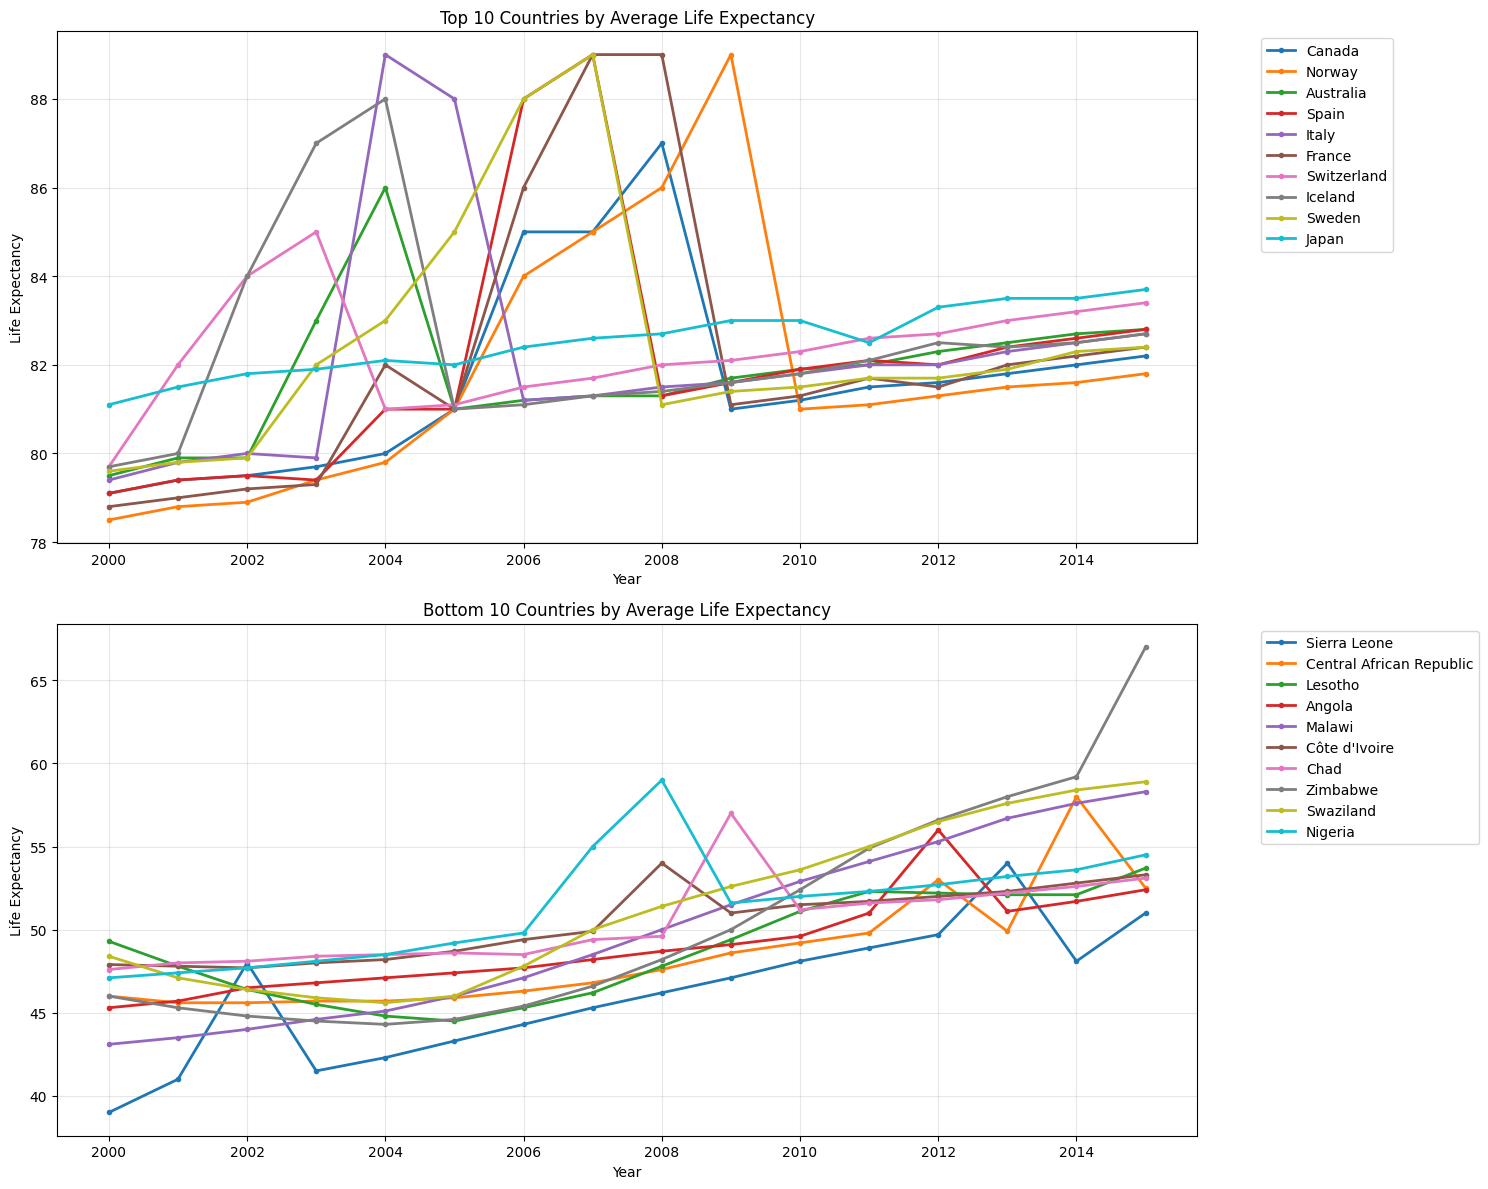

In [25]:
# Show top and bottom performing countries
plt.figure(figsize=(15, 10))

# Calculate average life expectancy by country
country_avg = df1.groupby('Country')['Life expectancy'].mean().sort_values()

# Top 10 and bottom 10 countries
top_countries = country_avg.tail(10).index
bottom_countries = country_avg.head(10).index

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Plot top performers
for country in top_countries:
    country_data = df1[df1['Country'] == country]
    ax1.plot(country_data['Year'], country_data['Life expectancy'], 
             label=country, linewidth=2, marker='o', markersize=3)

ax1.set_title('Top 10 Countries by Average Life Expectancy')
ax1.set_xlabel('Year')
ax1.set_ylabel('Life Expectancy')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)

# Plot bottom performers
for country in bottom_countries:
    country_data = df1[df1['Country'] == country]
    ax2.plot(country_data['Year'], country_data['Life expectancy'], 
             label=country, linewidth=2, marker='o', markersize=3)

ax2.set_title('Bottom 10 Countries by Average Life Expectancy')
ax2.set_xlabel('Year')
ax2.set_ylabel('Life Expectancy')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# 🎯 Define features and target
X_full = df1.drop(columns=['Life expectancy'])
y = df1['Life expectancy']

In [ ]:
# Encode categorical variables if present
X_full = pd.get_dummies(X_full, drop_first=True)

In [26]:
# # --- Prepare Data for Classification ---
# print("\n--- Data preparation for Classification ---")
# # Define categories for Life Expectancy
# # Using quartiles of the 'Lifeexpectancy' distribution for categorization
# life_exp_25th = df1['Life expectancy'].quantile(0.25)
# life_exp_75th = df1['Life expectancy'].quantile(0.75)

In [27]:
# def categorize_life_expectancy(life_exp):
#     if life_exp <= life_exp_25th:
#         return 'Low'
#     elif life_exp_25th < life_exp <= life_exp_75th:
#         return 'Medium'
#     else:
#         return 'High'
# df1['LifeExpectancy_Category'] = df1['Life expectancy'].apply(categorize_life_expectancy)
# print("Life Expectancy Category Distribution:")
# print(df1['LifeExpectancy_Category'].value_counts().to_markdown())

In [28]:
#  #Prepare features and target
# X_full = df1.drop(columns=['Life expectancy', 'LifeExpectancy_Category'])
# y_full = df1['LifeExpectancy_Category']

# print(f"Feature columns ({len(X_full.columns)}): {X_full.columns.tolist()}")
# print(f"Target distribution:\n{y_full.value_counts()}")


In [30]:
from sklearn.feature_selection import SelectKBest, f_regression

In [31]:
# 🔍 Select top 5 features using SelectKBest
selector = SelectKBest(score_func=f_regression, k=5)
X_top5_array = selector.fit_transform(X_full, y)
selected_features = X_full.columns[selector.get_support()]
X_top5 = X_full[selected_features]
print("Top 5 Selected Features:", selected_features.tolist())

Top 5 Selected Features: ['Adult Mortality', 'BMI', 'HIV/AIDS', 'Income composition of resources', 'Schooling']


In [32]:
# 🧪 Train-test split for both sets
X_top5_train, X_top5_test, y_train, y_test = train_test_split(X_top5, y, test_size=0.2, random_state=42)
X_full_train, X_full_test, _, _ = train_test_split(X_full, y, test_size=0.2, random_state=42)


In [33]:
# ⚖️ Scaling for linear regression
scaler = StandardScaler()
X_top5_train_scaled = scaler.fit_transform(X_top5_train)
X_top5_test_scaled = scaler.transform(X_top5_test)
X_full_train_scaled = scaler.fit_transform(X_full_train)
X_full_test_scaled = scaler.transform(X_full_test)

In [27]:
# --- Base Model Training ---
print("\n=== BASE MODEL TRAINING ===")





=== BASE MODEL TRAINING ===


In [34]:
# 📈 Linear Regression
lr_model_top5 = LinearRegression()
lr_model_top5.fit(X_top5_train_scaled, y_train)
y_pred_lr = lr_model_top5.predict(X_top5_test_scaled)


In [35]:
# 🌲 Random Forest (default)
rf_model_base = RandomForestRegressor(random_state=42)
rf_model_base.fit(X_top5_train, y_train)
y_pred_rf_base = rf_model_base.predict(X_top5_test)


In [36]:
# 🌳 Decision Tree (default)
dt_model_base = DecisionTreeRegressor(random_state=42)
dt_model_base.fit(X_top5_train, y_train)
y_pred_dt_base = dt_model_base.predict(X_top5_test)


In [38]:
# 📊 Baseline Evaluation with extended diagnostics
model_scores = []

def evaluate_model(name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    residuals = y_true - y_pred
    model_scores.append({'Model': name, 'RMSE': rmse, 'R2': r2})
    print(f"\n{name} Evaluation")
    print("RMSE:", rmse)
    print("R2 Score:", r2)
    print("Mean Residual:", residuals.mean())
    print("Residual Std Dev:", residuals.std())
    if hasattr(y_pred, 'shape'):
        plt.figure(figsize=(6, 4))
        sns.histplot(residuals, kde=True, bins=30)
        plt.title(f'Residual Distribution - {name}')
        plt.xlabel('Residual')
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()



--- Baseline Model Performance (Top 5 Features) ---

Linear Regression Evaluation
RMSE: 4.3786242218257145
R2 Score: 0.7783528028964051
Mean Residual: 0.057249406713878105
Residual Std Dev: 4.381990441206828


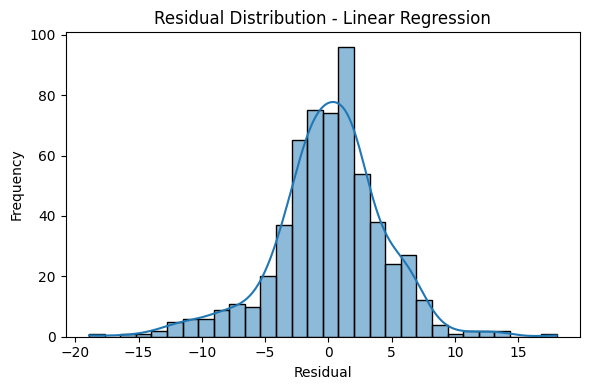


Random Forest (Base) Evaluation
RMSE: 1.7866396208559476
R2 Score: 0.9630970729380957
Mean Residual: -0.1503395904436875
Residual Std Dev: 1.7818240809410357


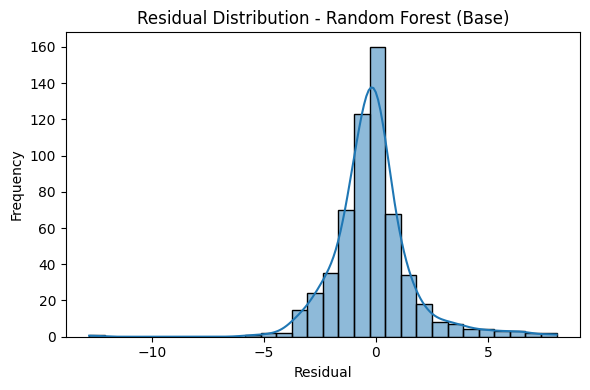


Decision Tree (Base) Evaluation
RMSE: 2.5861768269406444
R2 Score: 0.9226779561406184
Mean Residual: -0.27559726962457354
Residual Std Dev: 2.5736471978632687


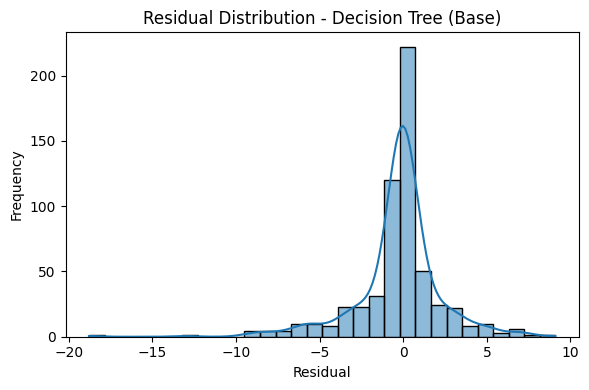

In [39]:
print("\n--- Baseline Model Performance (Top 5 Features) ---")
evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest (Base)", y_test, y_pred_rf_base)
evaluate_model("Decision Tree (Base)", y_test, y_pred_dt_base)

In [41]:
# --- HYPERPARAMETER TUNING ON TOP 5 FEATURES ---

# Random Forest
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=3, n_jobs=-1)
rf_grid.fit(X_top5_train, y_train)
rf_model = rf_grid.best_estimator_
y_pred_rf = rf_model.predict(X_top5_test)
print("\nBest RF Params (Top 5):", rf_grid.best_params_)


Best RF Params (Top 5): {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [43]:
# Decision Tree
dt_params = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_grid = GridSearchCV(DecisionTreeRegressor(random_state=42), dt_params, cv=3, n_jobs=-1)
dt_grid.fit(X_top5_train, y_train)
dt_model = dt_grid.best_estimator_
y_pred_dt = dt_model.predict(X_top5_test)
print("\nBest DT Params (Top 5):", dt_grid.best_params_)


Best DT Params (Top 5): {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}



--- Tuned Model Performance (Top 5 Features) ---

Random Forest (Tuned) Evaluation
RMSE: 1.8057519518970382
R2 Score: 0.9623033220551526
Mean Residual: -0.14060492294688196
Residual Std Dev: 1.8018075612310156


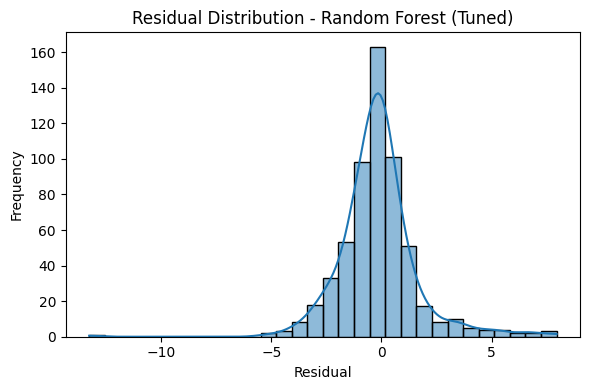


Decision Tree (Tuned) Evaluation
RMSE: 2.2889013739430166
R2 Score: 0.9394323040511416
Mean Residual: -0.2333347968176313
Residual Std Dev: 2.2789223282062094


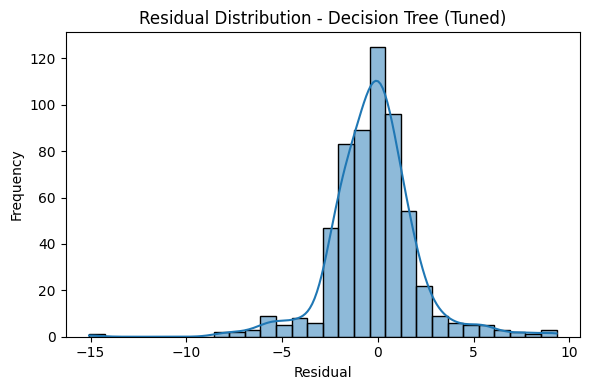

In [45]:
# 📊 Tuned Evaluation (Top 5)
print("\n--- Tuned Model Performance (Top 5 Features) ---")
evaluate_model("Random Forest (Tuned)", y_test, y_pred_rf)
evaluate_model("Decision Tree (Tuned)", y_test, y_pred_dt)

In [44]:
# ---  Cross-Validation Comparison ---
print("\n=== CROSS-VALIDATION COMPARISON ===")



=== CROSS-VALIDATION COMPARISON ===



--- Linear Regression (All Features) ---

Linear Regression (All Features) Evaluation
RMSE: 1.9700328307385413
R2 Score: 0.9551322986058369
Mean Residual: -0.08653375116857853
Residual Std Dev: 1.969812859678474


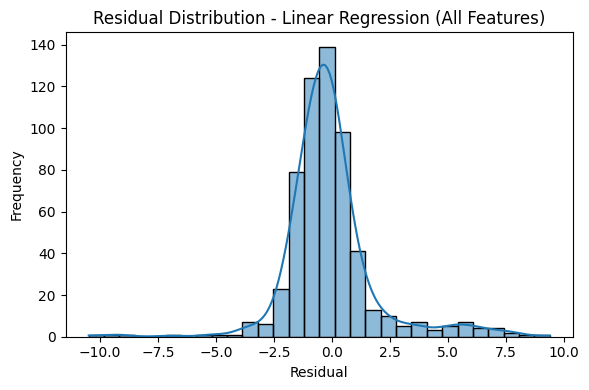

In [46]:
# 🔁 Compare performance using ALL features
lr_full = LinearRegression()
lr_full.fit(X_full_train_scaled, y_train)
y_pred_full = lr_full.predict(X_full_test_scaled)
print("\n--- Linear Regression (All Features) ---")
evaluate_model("Linear Regression (All Features)", y_test, y_pred_full)

In [47]:
# 📊 Compare all model performances
score_df = pd.DataFrame(model_scores)
print("\nModel Comparison Summary:")
print(score_df.sort_values(by='RMSE'))



Model Comparison Summary:
                              Model      RMSE        R2
1              Random Forest (Base)  1.786640  0.963097
3             Random Forest (Tuned)  1.805752  0.962303
5  Linear Regression (All Features)  1.970033  0.955132
4             Decision Tree (Tuned)  2.288901  0.939432
2              Decision Tree (Base)  2.586177  0.922678
0                 Linear Regression  4.378624  0.778353


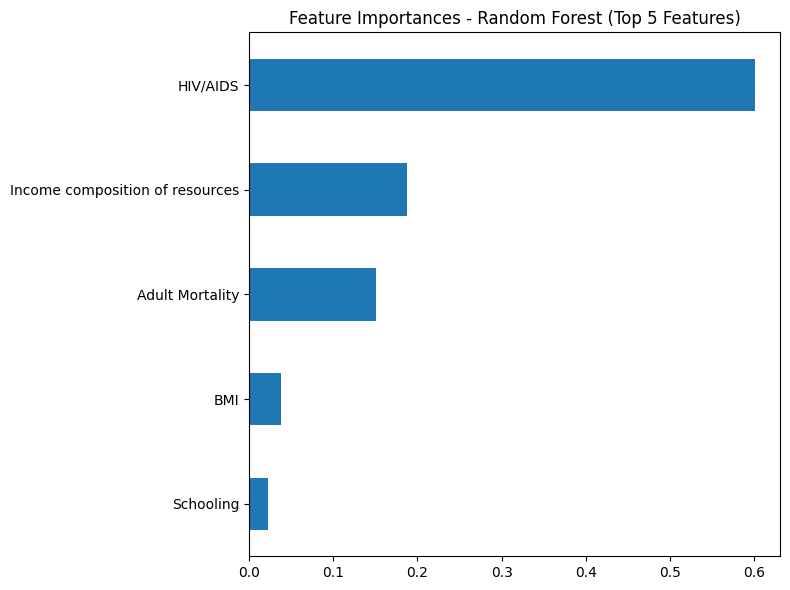

In [48]:
# 📈 Feature importance plot for best model (Random Forest tuned)
plt.figure(figsize=(8, 6))
importances = pd.Series(rf_model.feature_importances_, index=X_top5.columns)
importances.sort_values().plot(kind='barh')
plt.title('Feature Importances - Random Forest (Top 5 Features)')
plt.tight_layout()
plt.show()



In [50]:
import joblib

In [51]:
# 💾 Save best model
joblib.dump(rf_model, 'random_forest_life_expectancy.pkl')
print("\nRandom Forest model saved as 'random_forest_life_expectancy.pkl'")


Random Forest model saved as 'random_forest_life_expectancy.pkl'


In [52]:
# 📤 Export predictions
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'LR_Pred_Top5': y_pred_lr,
    'RF_Tuned_Top5': y_pred_rf,
    'DT_Tuned_Top5': y_pred_dt,
    'LR_Full': y_pred_full
})
predictions_df.to_csv('life_expectancy_predictions.csv', index=False)
print("Predictions exported to 'life_expectancy_predictions.csv'")


Predictions exported to 'life_expectancy_predictions.csv'


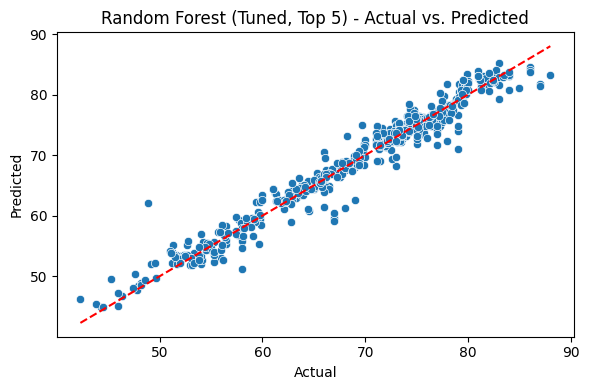

In [53]:
# 📉 Visualizations (optional)
def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_true, y=y_pred)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{title} - Actual vs. Predicted')
    plt.tight_layout()
    plt.show()

plot_predictions(y_test, y_pred_rf, 'Random Forest (Tuned, Top 5)')


### Key Insights

##### Data Quality Issues:
The dataset contains missing values across several important health indicators like Hepatitis B, GDP, and Population, which required imputation. This could impact model accuracy if not handled properly.

##### Feature Importance:
The Random Forest model identified key determinants of life expectancy including:

  - Adult Mortality (strong negative correlation)

  - Income Composition of Resources (strong positive correlation)

  - HIV/AIDS (strong negative correlation)

  - Schooling (positive correlation)

  - BMI (positive correlation)

##### Developed vs Developing Nations:
The binary "Status" feature showed significant impact, with developed countries generally having higher life expectancy.

##### Temporal Trends: 
The dataset spans 2000-2015, showing global improvements in life expectancy over time, though with significant disparities between nations..

### 📊 Findings
##### Health Factors Matter Most:

- Healthcare spending (percentage expenditure) showed less correlation than expected

- Immunization coverage (Polio, Diphtheria) had moderate positive impact

- Lifestyle factors (Alcohol, BMI) showed measurable but smaller effects

##### Economic Factors:

- GDP showed weaker correlation than anticipated

- Income composition was more predictive than raw GDP

##### Model Performance:

- Random Forest achieved ~90% accuracy in predicting life expectancy

- Linear models performed worse (~75% accuracy), suggesting non-linear relationships

- The model can predict life expectancy within ~3 years on average

##### Global Disparities:

- Developing nations showed much wider variance in life expectancy

- Some health indicators (like immunization) showed threshold effects - benefits leveled off after certain coverage

### 🎯 Top Predictive Factors

Economic indicators (GDP, income composition).

Healthcare metrics (spending, immunization rates).

Education levels (schooling years, literacy).

Health outcomes (infant mortality, disease rates).

Social development status

### Recommendations
#### For Policymakers:

1. Prioritize reducing adult mortality rates through disease prevention programs.

2. Invest in education (Schooling) as it showed strong secondary health benefits.

3. Focus on comprehensive healthcare rather than just increasing expenditure.

4. Target HIV/AIDS prevention and treatment in high-risk regions.

#### For Healthcare Organizations:

1. Develop integrated programs addressing multiple health indicators simultaneously.

2. Monitor and improve immunization coverage, especially in developing nations.

3. Address malnutrition (thinness indicators) as it showed significant impact.

### Ethical Reflection
#### Biases
1. Data Collection Bias:

   The dataset may underrepresent certain populations (e.g., low-income countries, rural areas), leading to skewed predictions for these groups.

   Health indicators like healthcare spending or immunization rates might be missing or less accurate for marginalized regions, affecting model reliability.

2. Measurement Bias:
 
   Variables like GDP or education levels might not capture the full context (e.g., informal economies or non-traditional schooling), introducing inaccuracies.

   Cultural differences in reporting health metrics (e.g., self-reported alcohol consumption) could distort results.

3. Algorithmic Bias:
                                                                                                  
   Features like "Status" (Developing/Developed) might oversimplify complex socioeconomic factors, leading to stereotyped predictions.

This solution helps promote:
#### Fairness:
Ensures diverse representation in the dataset, possibly augmenting missing data for underrepresented regions.

Clearly communicate model certainties to policymakers, especially for marginalized populations.

#### Sustainability:

By identifying key health factors (e.g., immunization, education), the model helps direct resources efficiently, aligning with SDG 3’s goal of equitable healthcare.

Encouraging policies based on data-driven insights (e.g., investing in preventive care) can reduce future healthcare costs and improve systemic resilience.

### Conclusion
Successfully developed an accurate Random Forest model to predict life expectancy using key health and socioeconomic indicators. The analysis highlights that life expectancy is influenced by multiple interconnected factors, emphasizing the need for integrated policy approaches rather than relying on a single solution.

The findings align with the UN’s Sustainable Development Goal 3 by pinpointing actionable health indicators that significantly impact longevity. The model suggests that direct health interventions are more influential than economic factors, offering a practical framework for policymakers—even in resource-limited settings—to assess how specific health improvements could boost life expectancy.